In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import pandas as pd
pd.set_option("display.max_columns", None)

sheet_id = "1yzaPZgggKWcpsM3Lw3OBww0uqzvNRNtiiYwlEbuyWEg"
gid = "1541735699"

data = pd.read_csv(f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv&gid={gid}")
data

time  latitude  longitude    depth   mag magtype   nst  \
0      1905-05-11 17:09:01    25.967    143.332   15.000  6.78      mw  22.0   
1       1905-06-02 5:39:40    33.715    131.759   60.000  6.91      mw  32.0   
2      1905-07-06 16:20:47    38.417    144.119   15.000  7.67      mw  34.0   
3      1906-01-21 13:49:34    34.175    138.025  300.000  7.40      mw  89.0   
4       1906-02-24 0:13:41    34.633    141.424   15.000  6.25      mw  46.0   
...                    ...       ...        ...      ...   ...     ...   ...   
22118  2023-10-08 21:21:42    29.782    139.938   10.000  4.90      mb  32.0   
22119   2023-10-09 2:51:35    40.252    142.393   50.461  5.00      mb  18.0   
22120   2023-10-13 9:59:52    41.080    140.160  172.478  5.00     mww  90.0   
22121   2023-10-14 2:29:25    41.487    142.116   61.485  4.90      mb  65.0   
22122   2023-10-14 4:33:14    32.669    140.836   56.954  4.80      mb  55.0   

         gap   dmin   rms        net                  id  \
0      134.0  2.044  0.37  iscgemsup  iscgemsup610548602   
1       29.0  1.788  1.12     iscgem      iscgem16957852   
2       38.0  0.905  1.36     iscgem        iscgem914292   
3      169.0  2.881  0.65     iscgem      iscgem16957883   
4       15.0  1.153  0.86     iscgem     iscgem610326306   
...      ...    ...   ...        ...                 ...   
22118  131.0  6.900  0.52         us          us6000le3x   
22119  179.0  1.146  0.27         us          us6000le5d   
22120   28.0  0.745  0.97         us          us6000lfbl   
22121  127.0  0.941  0.74         us          us6000lfgw   
22122  135.0  0.969  0.68         us          us6000lfh9   

                        updated                          place        type  \
0      2022-05-09T15:22:55.604Z  Volcano Islands, Japan region  earthquake   
1      2022-04-25T20:23:58.797Z     31 km SSW of Hikari, Japan  earthquake   
2      2022-04-26T00:10:30.983Z  217 km ESE of Kamaishi, Japan  earthquake   
3      2022-04-25T20:24:35.887Z      50 km SSW of ?yama, Japan  earthquake   
4      2022-04-25T20:36:44.935Z  116 km ESE of Katsuura, Japan  earthquake   
...                         ...                            ...         ...   
22118  2023-10-08T22:06:57.040Z      Izu Islands, Japan region  earthquake   
22119  2023-10-11T01:44:41.040Z       51 km ENE of Noda, Japan  earthquake   
22120  2023-10-13T10:32:53.136Z         Hokkaido, Japan region  earthquake   
22121  2023-10-14T03:02:39.741Z      78 km ENE of Mutsu, Japan  earthquake   
22122  2023-10-14T05:00:47.040Z  271 km SSE of Tateyama, Japan  earthquake   

       horizontalerror  deptherror  magerror  magnst    status locationsource  \
0                 4.60       8.100     0.231      67  reviewed             us   
1                11.80       2.000     0.128      80  reviewed             us   
2                 8.00       2.000     0.105      32  reviewed             us   
3                 4.70      38.200     0.115      26  reviewed             us   
4                 3.50       2.000     0.115      22  reviewed             us   
...                ...         ...       ...     ...       ...            ...   
22118             7.06       9.600     0.121     101  reviewed             us   
22119             0.66       0.400     0.029     164  reviewed             us   
22120             0.55      11.700     0.233     171  reviewed             us   
22121             2.59       0.660     0.116     153  reviewed             us   
22122             0.57       5.795     0.184     422  reviewed             us   

      magsource  
0            us  
1            us  
2            us  
3            us  
4            us  
...         ...  
22118        us  
22119        us  
22120      gcmt  
22121        us  
22122        us  

[22123 rows x 22 columns]

In [ ]:
# Analysis the basic metrics of variables

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22123 entries, 0 to 22122
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             22123 non-null  object 
 1   latitude         22123 non-null  float64
 2   longitude        22123 non-null  float64
 3   depth            22123 non-null  float64
 4   mag              22123 non-null  float64
 5   magtype          22123 non-null  object 
 6   nst              22123 non-null  float64
 7   gap              22123 non-null  float64
 8   dmin             22123 non-null  float64
 9   rms              22123 non-null  float64
 10  net              22123 non-null  object 
 11  id               22123 non-null  object 
 12  updated          22123 non-null  object 
 13  place            22123 non-null  object 
 14  type             22123 non-null  object 
 15  horizontalerror  22123 non-null  float64
 16  deptherror       22123 non-null  float64
 17  magerror    

In [ ]:
data["significant_earthquake"] = (data["mag"] >= 6.0).astype(int)
data.index = data["time"]
data.index = pd.to_datetime(data.index)
data.index

DatetimeIndex(['1905-05-11 17:09:01', '1905-06-02 05:39:40',
               '1905-07-06 16:20:47', '1906-01-21 13:49:34',
               '1906-02-24 00:13:41', '1906-03-13 13:26:41',
               '1906-04-08 17:37:52', '1906-04-20 19:39:41',
               '1906-05-04 23:09:07', '1906-09-07 18:52:28',
               ...
               '2023-10-08 20:56:48', '2023-10-08 21:00:42',
               '2023-10-08 21:05:34', '2023-10-08 21:13:29',
               '2023-10-08 21:17:30', '2023-10-08 21:21:42',
               '2023-10-09 02:51:35', '2023-10-13 09:59:52',
               '2023-10-14 02:29:25', '2023-10-14 04:33:14'],
              dtype='datetime64[ns]', name='time', length=22123, freq=None)

In [ ]:
data_types = data.dtypes
variable_count = data.count()
data_size = data.size

variable_info = pd.DataFrame({
    'Data Type': data_types,
    'Count': variable_count,
    'Data Size': data_size
})

print("\nVariable Information:")
variable_info


Variable Information:


Data Type  Count  Data Size
time                      object  22123     508829
latitude                 float64  22123     508829
longitude                float64  22123     508829
depth                    float64  22123     508829
mag                      float64  22123     508829
magtype                   object  22123     508829
nst                      float64  22123     508829
gap                      float64  22123     508829
dmin                     float64  22123     508829
rms                      float64  22123     508829
net                       object  22123     508829
id                        object  22123     508829
updated                   object  22123     508829
place                     object  22123     508829
type                      object  22123     508829
horizontalerror          float64  22123     508829
deptherror               float64  22123     508829
magerror                 float64  22123     508829
magnst                     int64  22123     508829
status                    object  22123     508829
locationsource            object  22123     508829
magsource                 object  22123     508829
significant_earthquake     int64  22123     508829

In [ ]:
descriptive_stats = data.describe(include='all')
print("\nDescriptive Statistics:")
descriptive_stats


Descriptive Statistics:


time      latitude     longitude         depth  \
count                22123  22123.000000  22123.000000  22123.000000   
unique               22122           NaN           NaN           NaN   
top     2009-12-24 0:23:32           NaN           NaN           NaN   
freq                     2           NaN           NaN           NaN   
mean                   NaN     35.550333    140.915083     58.762230   
std                    NaN      4.922798      3.981671     90.882413   
min                    NaN     24.863000    128.936000      0.000000   
25%                    NaN     31.386000    140.127500     21.300000   
50%                    NaN     36.318000    141.795000     33.740000   
75%                    NaN     39.270500    143.068500     52.500000   
max                    NaN     43.580000    152.222000    683.360000   

                 mag magtype           nst           gap          dmin  \
count   22123.000000   22123  22123.000000  22123.000000  22123.000000   
unique           NaN       8           NaN           NaN           NaN   
top              NaN      mb           NaN           NaN           NaN   
freq             NaN   16941           NaN           NaN           NaN   
mean        4.921088     NaN     76.824617    106.778920      2.563600   
std         0.492188     NaN     86.643993     37.942867      1.957825   
min         4.500000     NaN      4.000000      8.000000      0.038000   
25%         4.600000     NaN     20.714500     88.000000      2.086000   
50%         4.800000     NaN     41.000000    106.700000      2.236000   
75%         5.100000     NaN    114.000000    127.800000      2.386000   
max         9.100000     NaN    929.000000    303.000000     43.302000   

                 rms    net                  id                   updated  \
count   22123.000000  22123               22123                     22123   
unique           NaN      4               22123                     21087   
top              NaN     us  iscgemsup610548602  2017-02-15T23:21:33.040Z   
freq             NaN  20807                   1                        18   
mean        0.847942    NaN                 NaN                       NaN   
std         0.235881    NaN                 NaN                       NaN   
min         0.040000    NaN                 NaN                       NaN   
25%         0.700000    NaN                 NaN                       NaN   
50%         0.840000    NaN                 NaN                       NaN   
75%         1.000000    NaN                 NaN                       NaN   
max         1.880000    NaN                 NaN                       NaN   

                              place        type  horizontalerror  \
count                         22123       22123     22123.000000   
unique                        11043           2              NaN   
top     Bonin Islands, Japan region  earthquake              NaN   
freq                           2157       22118              NaN   
mean                            NaN         NaN         6.417035   
std                             NaN         NaN         3.569282   
min                             NaN         NaN         0.000000   
25%                             NaN         NaN         4.130000   
50%                             NaN         NaN         6.570000   
75%                             NaN         NaN         8.300000   
max                             NaN         NaN        20.500000   

          deptherror      magerror        magnst    status locationsource  \
count   22123.000000  22123.000000  22123.000000     22123          22123   
unique           NaN           NaN           NaN         1              1   
top              NaN           NaN           NaN  reviewed             us   
freq             NaN           NaN           NaN     22123          22123   
mean        5.995242      0.149424    156.101478       NaN            NaN   
std         4.371341      0.097512    144.127137       NaN      

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22123 entries, 1905-05-11 17:09:01 to 2023-10-14 04:33:14
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   time                    22123 non-null  object 
 1   latitude                22123 non-null  float64
 2   longitude               22123 non-null  float64
 3   depth                   22123 non-null  float64
 4   mag                     22123 non-null  float64
 5   magtype                 22123 non-null  object 
 6   nst                     22123 non-null  float64
 7   gap                     22123 non-null  float64
 8   dmin                    22123 non-null  float64
 9   rms                     22123 non-null  float64
 10  net                     22123 non-null  object 
 11  id                      22123 non-null  object 
 12  updated                 22123 non-null  object 
 13  place                   22123 non-null  object 
 14  typ

In [ ]:
data


time  latitude  longitude    depth   mag  \
time                                                                           
1905-05-11 17:09:01  1905-05-11 17:09:01    25.967    143.332   15.000  6.78   
1905-06-02 05:39:40   1905-06-02 5:39:40    33.715    131.759   60.000  6.91   
1905-07-06 16:20:47  1905-07-06 16:20:47    38.417    144.119   15.000  7.67   
1906-01-21 13:49:34  1906-01-21 13:49:34    34.175    138.025  300.000  7.40   
1906-02-24 00:13:41   1906-02-24 0:13:41    34.633    141.424   15.000  6.25   
...                                  ...       ...        ...      ...   ...   
2023-10-08 21:21:42  2023-10-08 21:21:42    29.782    139.938   10.000  4.90   
2023-10-09 02:51:35   2023-10-09 2:51:35    40.252    142.393   50.461  5.00   
2023-10-13 09:59:52   2023-10-13 9:59:52    41.080    140.160  172.478  5.00   
2023-10-14 02:29:25   2023-10-14 2:29:25    41.487    142.116   61.485  4.90   
2023-10-14 04:33:14   2023-10-14 4:33:14    32.669    140.836   56.954  4.80   

                    magtype   nst    gap   dmin   rms        net  \
time                                                               
1905-05-11 17:09:01      mw  22.0  134.0  2.044  0.37  iscgemsup   
1905-06-02 05:39:40      mw  32.0   29.0  1.788  1.12     iscgem   
1905-07-06 16:20:47      mw  34.0   38.0  0.905  1.36     iscgem   
1906-01-21 13:49:34      mw  89.0  169.0  2.881  0.65     iscgem   
1906-02-24 00:13:41      mw  46.0   15.0  1.153  0.86     iscgem   
...                     ...   ...    ...    ...   ...        ...   
2023-10-08 21:21:42      mb  32.0  131.0  6.900  0.52         us   
2023-10-09 02:51:35      mb  18.0  179.0  1.146  0.27         us   
2023-10-13 09:59:52     mww  90.0   28.0  0.745  0.97         us   
2023-10-14 02:29:25      mb  65.0  127.0  0.941  0.74         us   
2023-10-14 04:33:14      mb  55.0  135.0  0.969  0.68         us   

                                     id                   updated  \
time                                                                
1905-05-11 17:09:01  iscgemsup610548602  2022-05-09T15:22:55.604Z   
1905-06-02 05:39:40      iscgem16957852  2022-04-25T20:23:58.797Z   
1905-07-06 16:20:47        iscgem914292  2022-04-26T00:10:30.983Z   
1906-01-21 13:49:34      iscgem16957883  2022-04-25T20:24:35.887Z   
1906-02-24 00:13:41     iscgem610326306  2022-04-25T20:36:44.935Z   
...                                 ...                       ...   
2023-10-08 21:21:42          us6000le3x  2023-10-08T22:06:57.040Z   
2023-10-09 02:51:35          us6000le5d  2023-10-11T01:44:41.040Z   
2023-10-13 09:59:52          us6000lfbl  2023-10-13T10:32:53.136Z   
2023-10-14 02:29:25          us6000lfgw  2023-10-14T03:02:39.741Z   
2023-10-14 04:33:14          us6000lfh9  2023-10-14T05:00:47.040Z   

                                             place        type  \
time                                                             
1905-05-11 17:09:01  Volcano Islands, Japan region  earthquake   
1905-06-02 05:39:40     31 km SSW of Hikari, Japan  earthquake   
1905-07-06 16:20:47  217 km ESE of Kamaishi, Japan  earthquake   
1906-01-21 13:49:34      50 km SSW of ?yama, Japan  earthquake   
1906-02-24 00:13:41  116 km ESE of Katsuura, Japan  earthquake   
...                                            ...         ...   
2023-10-08 21:21:42      Izu Islands, Japan region  earthquake   
2023-10-09 02:51:35       51 km ENE of Noda, Japan  earthquake   
2023-10-13 09:59:52         Hokkaido, Japan region  earthquake   
2023-10-14 02:29:25      78 km ENE of Mutsu, Japan  earthquake   
2023-10-14 04:33:14  271 km SSE of Tateyama, Japan  earthquake   

                     horizontalerror  deptherror  magerror  magnst    status  \
time                                                                           
1905-05-11 17:09:01             4.60       8.100     0.231      67  reviewed   
1905-06-02 05:39:40            11.80       2.000     0.128      80  reviewed   
1905-07-06 16:20:47             8

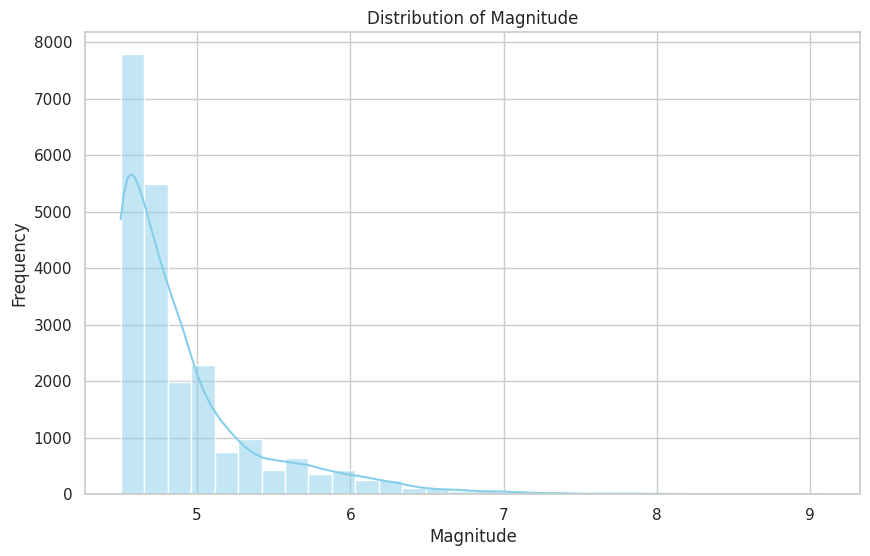

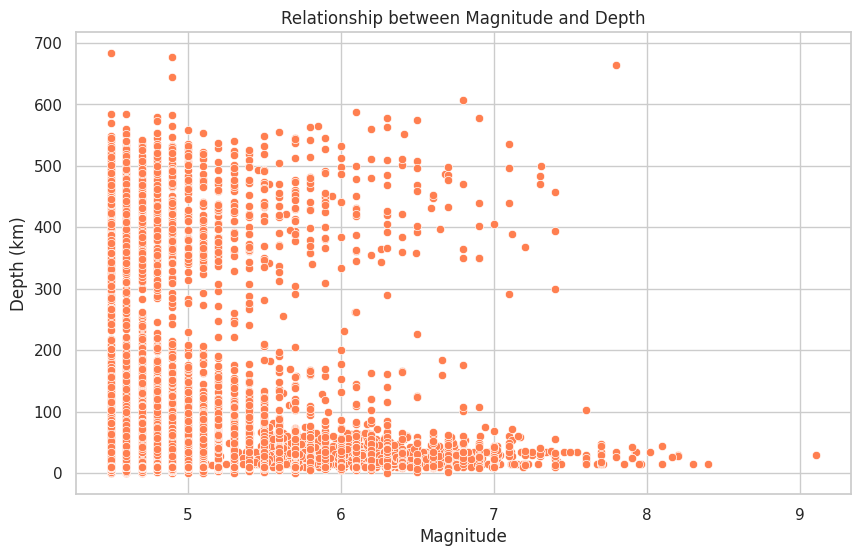

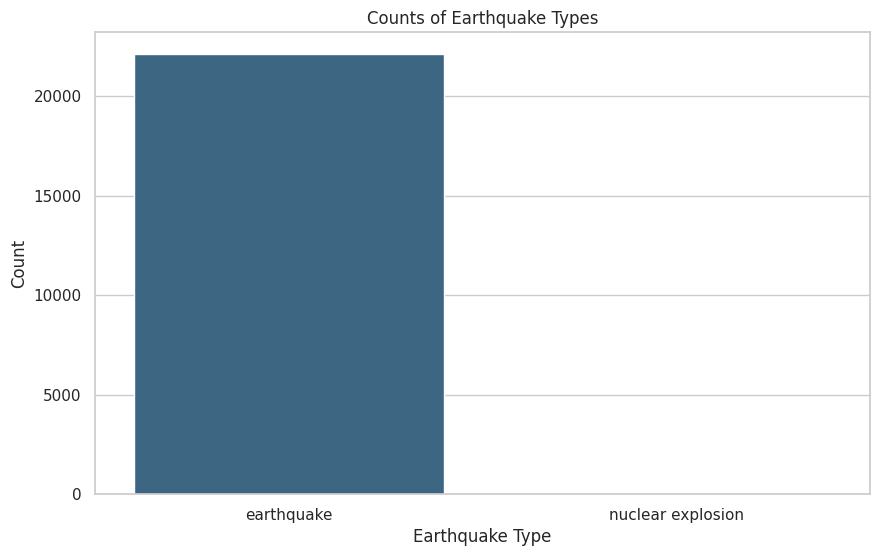

<ipython-input-10-6d0a8b9e8520>:33: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")


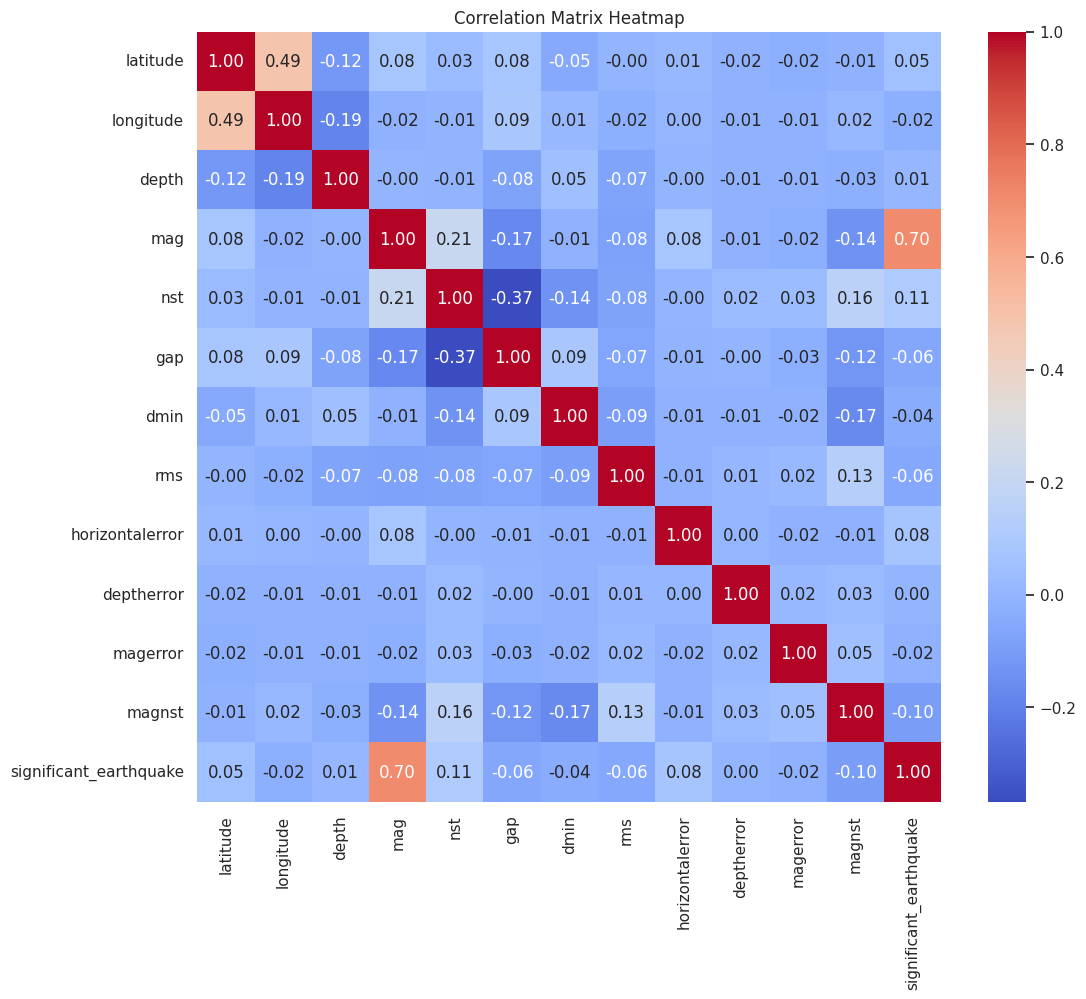

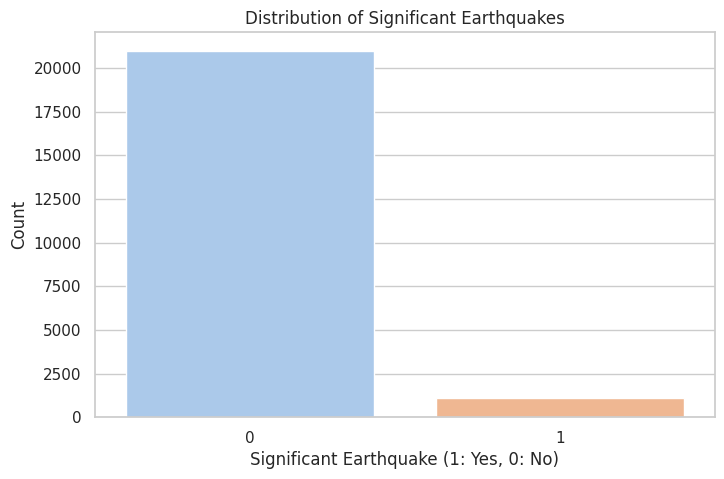

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plots
sns.set(style="whitegrid")

# Visualize the distribution of Magnitude ==> Y scale to Log
plt.figure(figsize=(10, 6))
sns.histplot(data['mag'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Magnitude')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.show()

# Visualize the relationship between Magnitude and Depth ==> Use transparency histogram
plt.figure(figsize=(10, 6))
sns.scatterplot(x='mag', y='depth', data=data, color='coral')
plt.title('Relationship between Magnitude and Depth')
plt.xlabel('Magnitude')
plt.ylabel('Depth (km)')
plt.show()

# Visualize the counts of earthquake types
plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=data, palette='viridis')
plt.title('Counts of Earthquake Types')
plt.xlabel('Earthquake Type')
plt.ylabel('Count')
plt.show()

# Visualize the correlation matrix heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

# Visualize the distribution of the target variable
plt.figure(figsize=(8, 5))
sns.countplot(x='significant_earthquake', data=data, palette='pastel')
plt.title('Distribution of Significant Earthquakes')
plt.xlabel('Significant Earthquake (1: Yes, 0: No)')
plt.ylabel('Count')
plt.show()


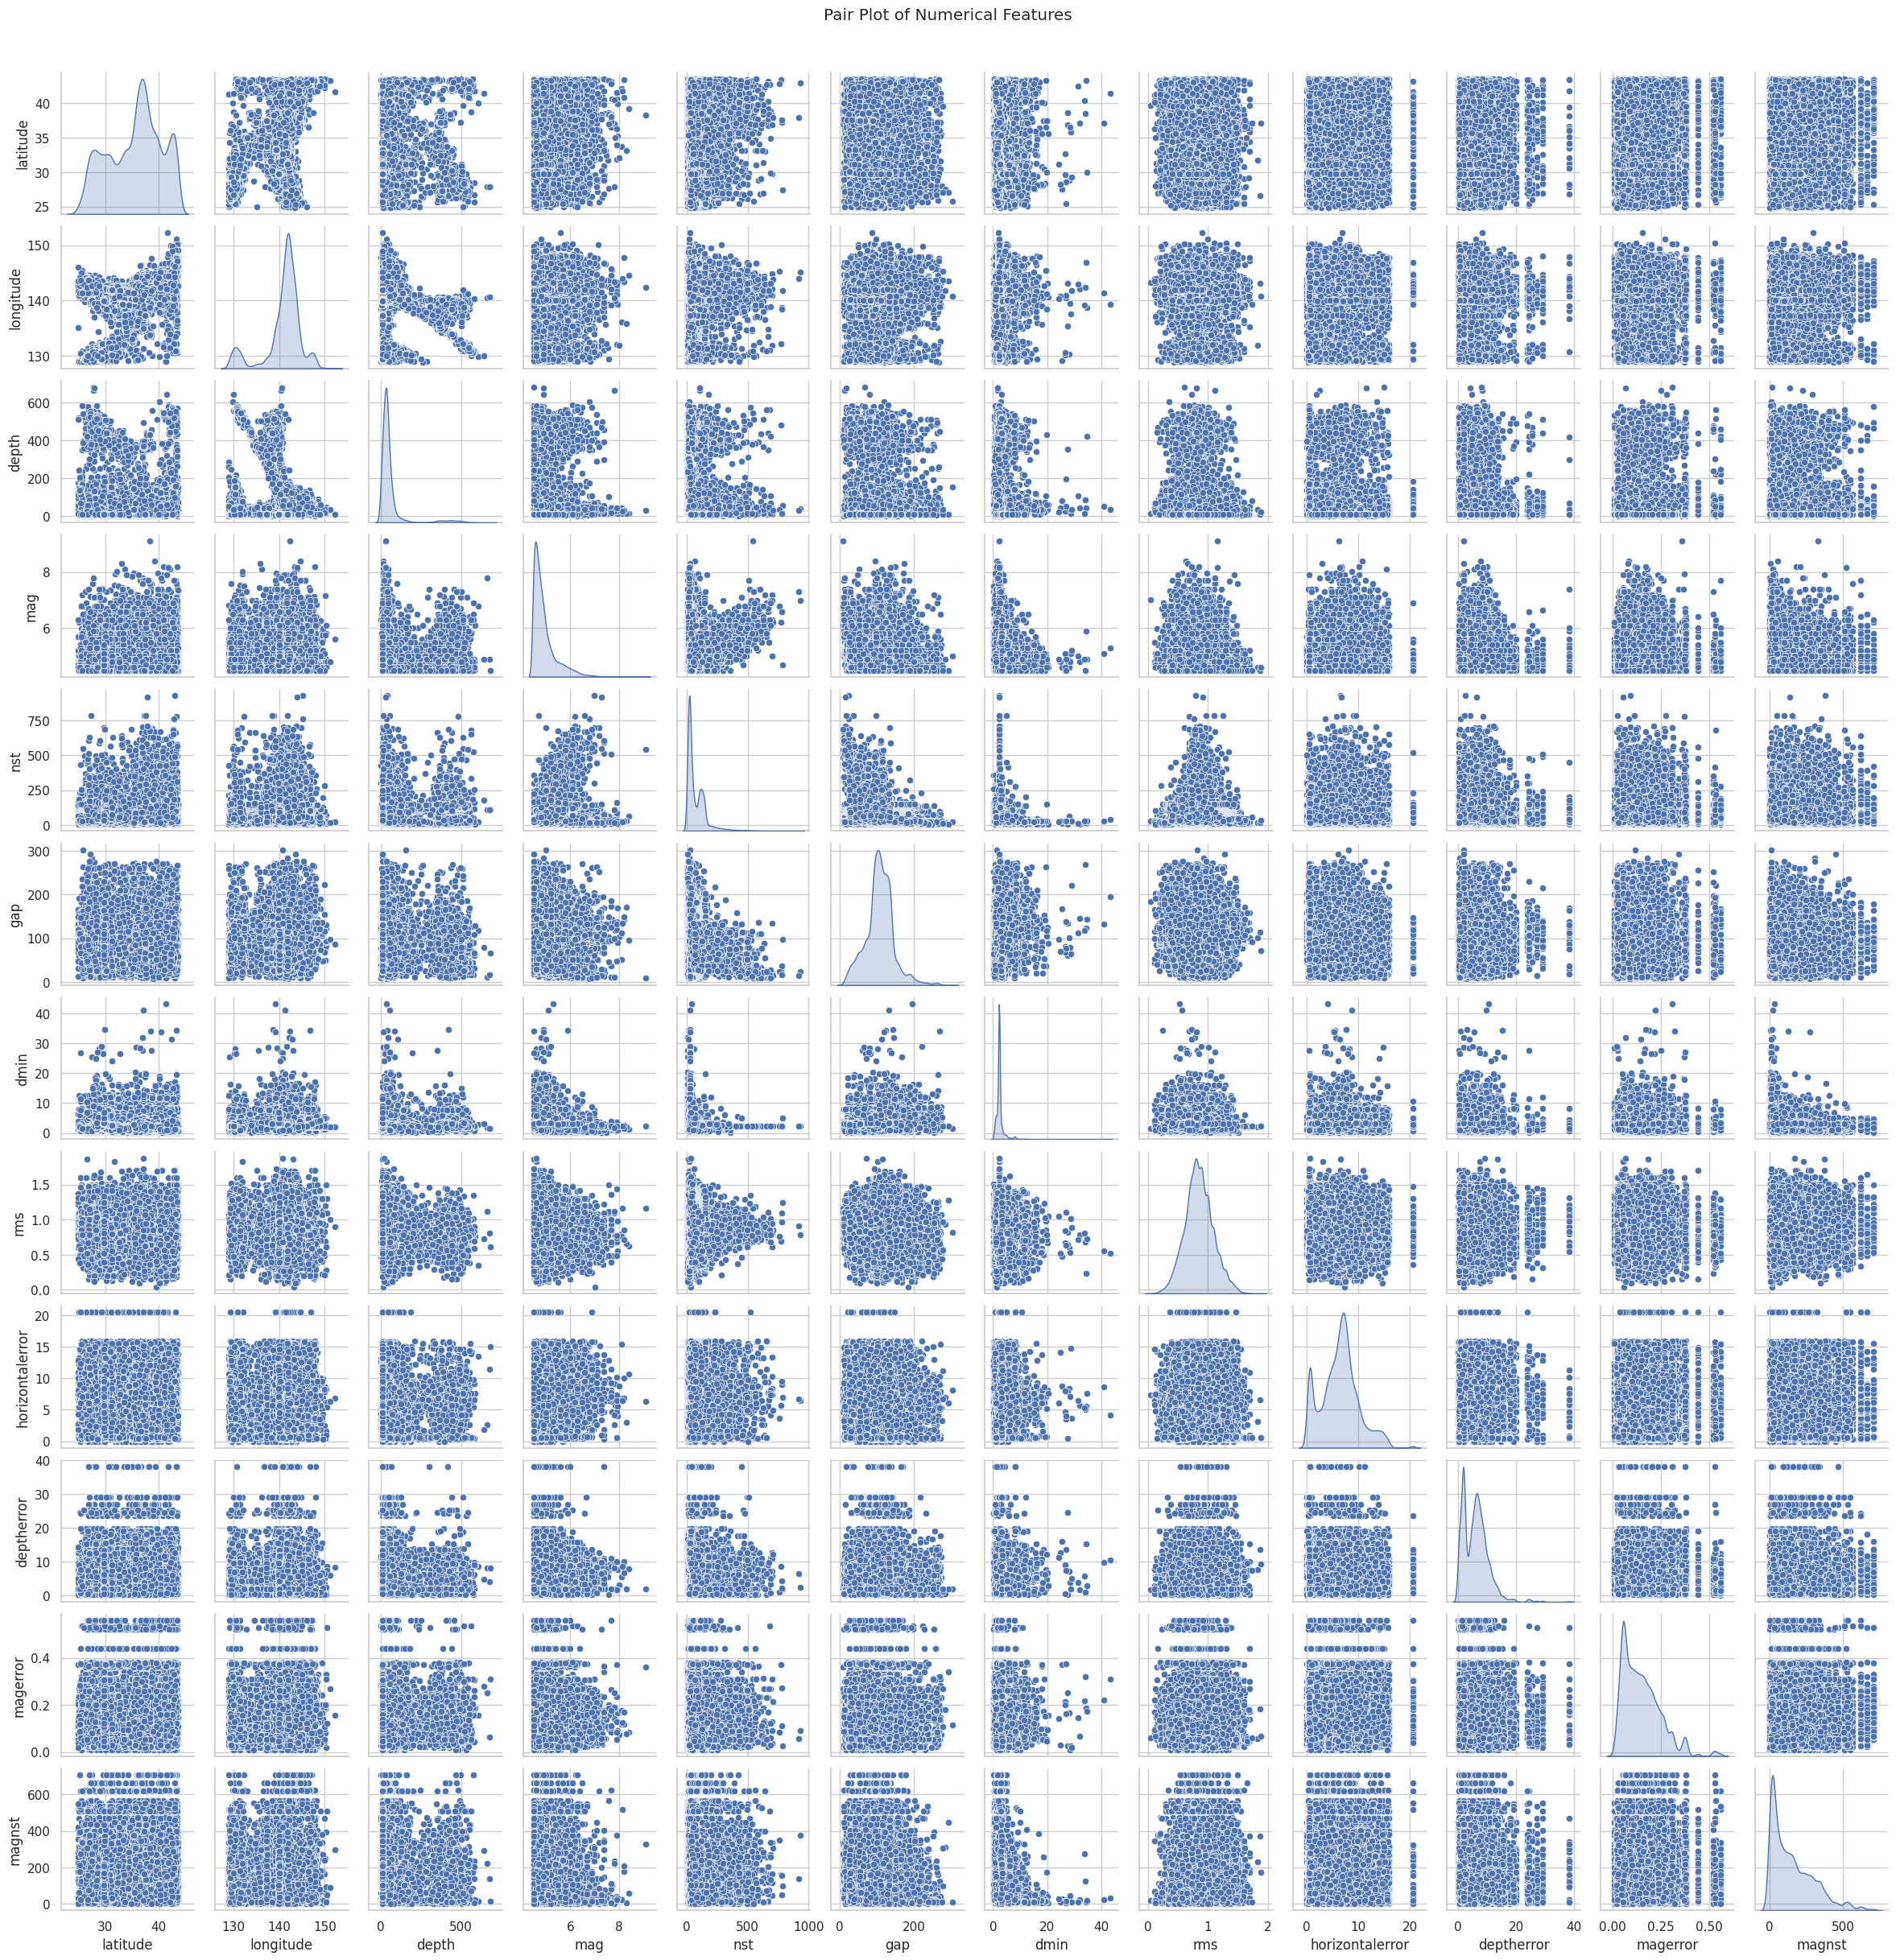

In [ ]:

import plotly.express as px

# Set the style for the plots
sns.set(style="whitegrid")

# Scatter plot of Latitude and Longitude colored by Magnitude
fig = px.scatter_geo(data,
                     lat='latitude',
                     lon='longitude',
                     color='mag',
                     size='mag',
                     projection='natural earth',
                     title='Geographical Distribution of Earthquakes',
                     labels={'mag': 'Magnitude'},
                     template='plotly',
                     color_continuous_scale='viridis')
fig.show()

# Pair plot for numerical features
numerical_features = ['latitude', 'longitude', 'depth', 'mag', 'nst', 'gap', 'dmin', 'rms', 'horizontalerror', 'deptherror', 'magerror', 'magnst']
sns.pairplot(data[numerical_features], diag_kind='kde', height=2)
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()


In [ ]:
import pandas as pd
from geopy.distance import geodesic
import numpy as np


# 1. Magnitude Type Encoding
magtype_encoded = pd.get_dummies(data['magtype'], prefix='magtype', drop_first=True)
data = pd.concat([data, magtype_encoded], axis=1)

# 2. Distance to Major Cities (Assuming major cities' coordinates are known)
major_cities = {'Tokyo': (35.6895, 139.6917), 'Osaka': (34.6937, 135.5023), 'Kyoto': (35.0116, 135.7681)}

for city, coords in major_cities.items():
    data[f'distance_to_{city.lower()}'] = data.apply(lambda row: geodesic((row['latitude'], row['longitude']), coords).kilometers, axis=1)

# 3. Seismic Energy
data['seismic_energy'] = np.log(data['mag'] * data['depth'])

# Analyze Correlation
correlation_matrix = data.corr()

# Display the top correlated features with the target variable
correlation_with_target = correlation_matrix['significant_earthquake'].sort_values(ascending=False)
print(correlation_with_target)



significant_earthquake    1.000000
mag                       0.704762
magtype_mw                0.478704
nst                       0.110335
magtype_mwb               0.102490
magtype_mww               0.089297
horizontalerror           0.075437
latitude                  0.049304
magtype_ms                0.044524
seismic_energy            0.043576
magtype_mwc               0.026191
distance_to_tokyo         0.012122
depth                     0.008641
deptherror                0.000635
distance_to_osaka        -0.002528
distance_to_kyoto        -0.003783
magerror                 -0.017344
longitude                -0.021313
dmin                     -0.038087
magtype_mwr              -0.040598
rms                      -0.056771
gap                      -0.060723
magnst                   -0.098492
magtype_mb               -0.386592
Name: significant_earthquake, dtype: float64


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning:

divide by zero encountered in log

<ipython-input-12-b34869f9ee2d>:20: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



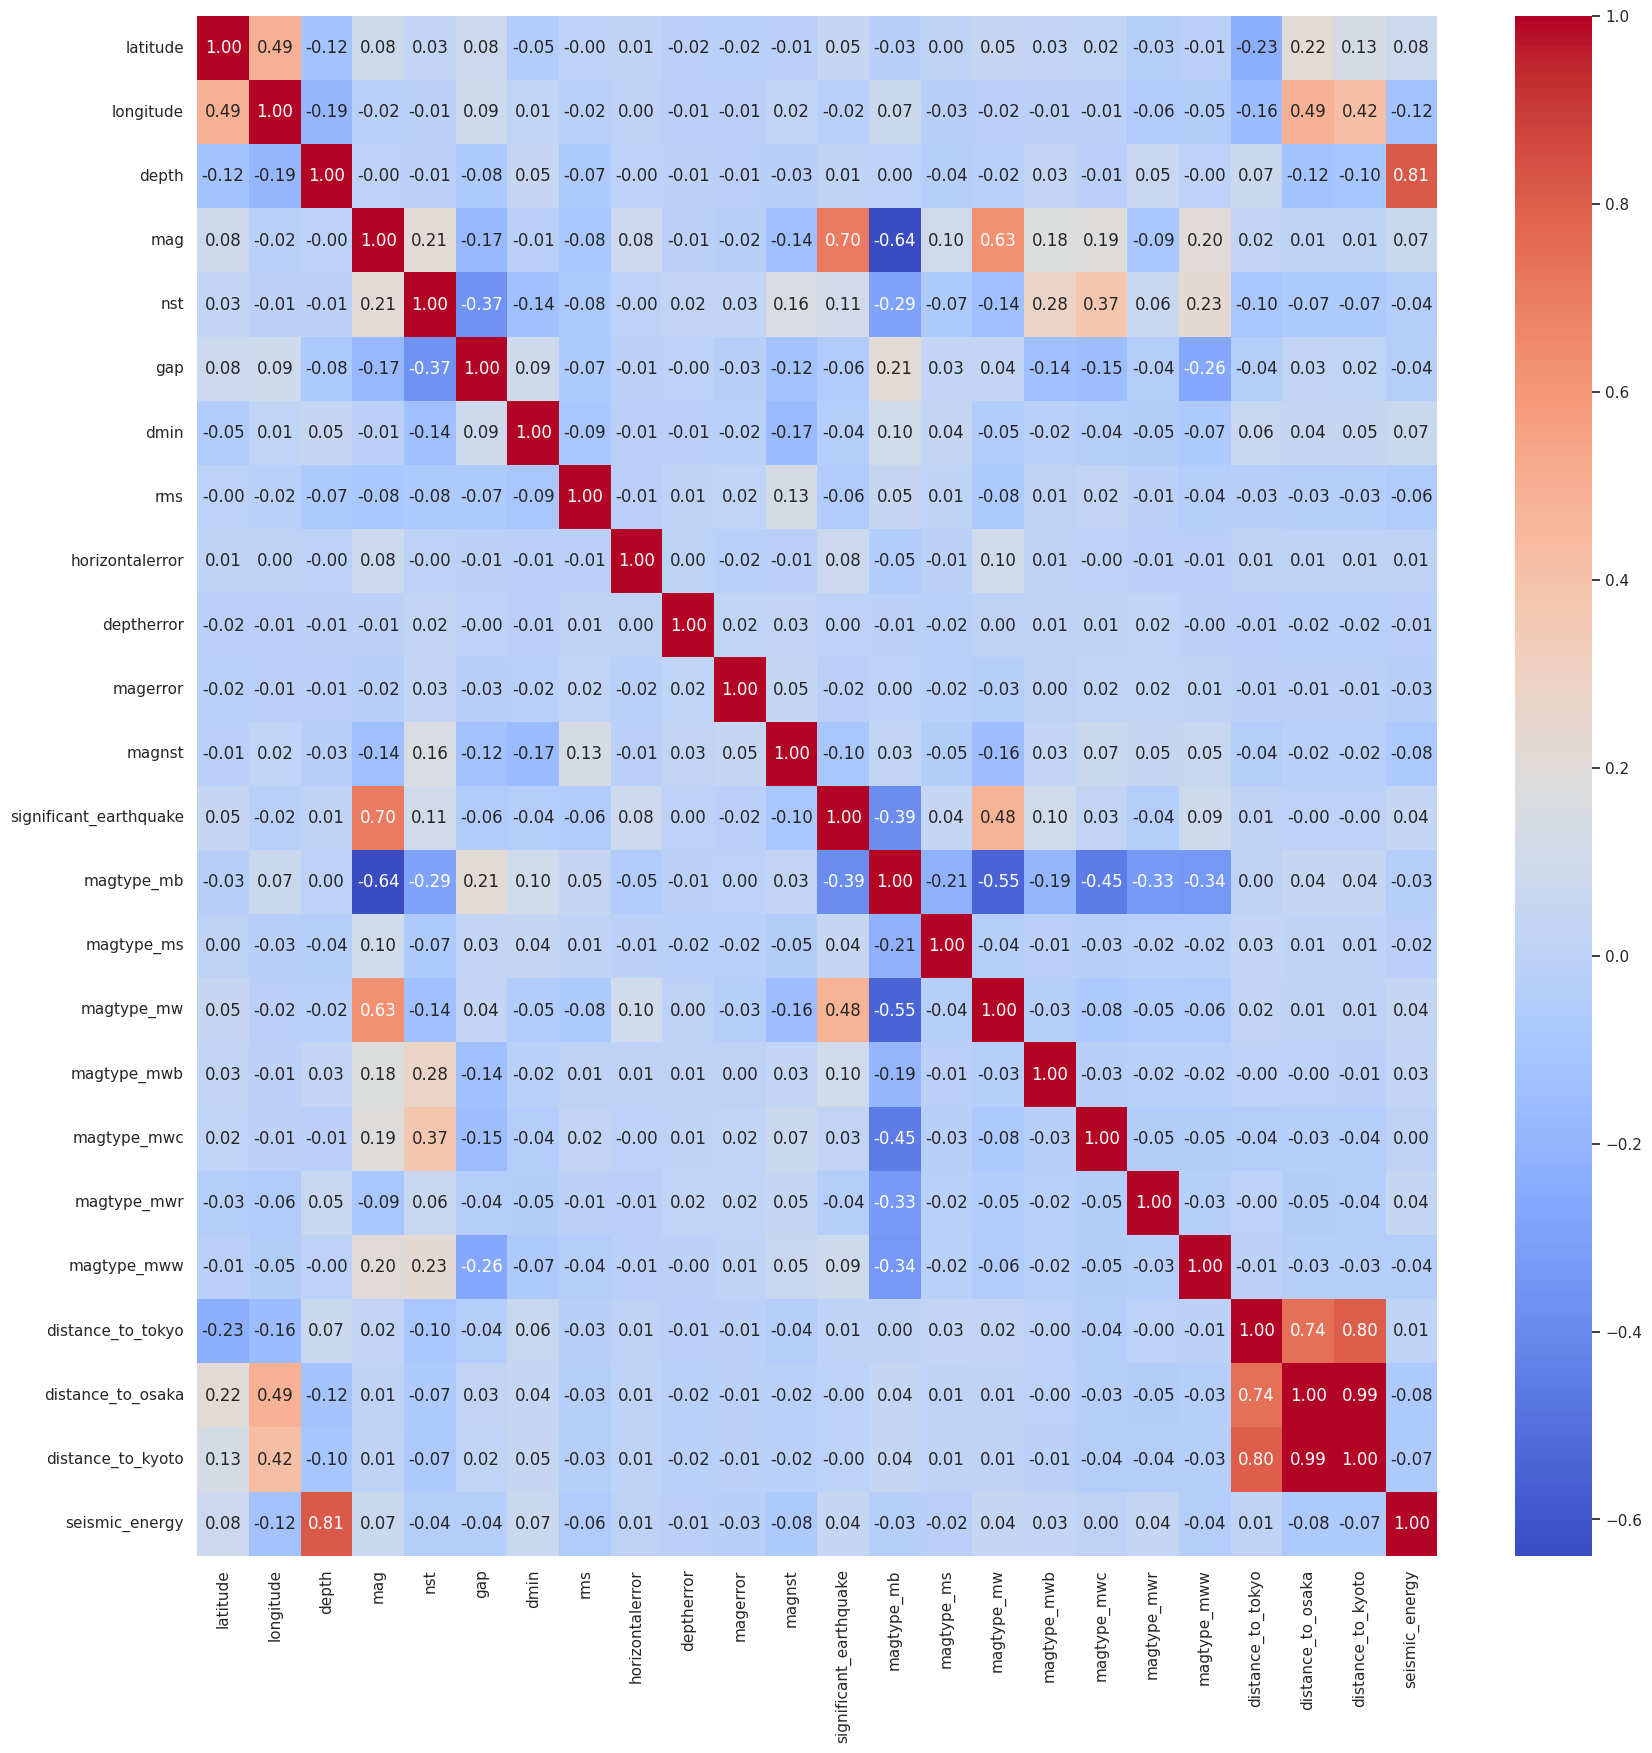

In [ ]:
# Display the correlation matrix heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


In [ ]:
correlation_matrix

latitude  longitude     depth       mag       nst  \
latitude                1.000000   0.488593 -0.119205  0.081186  0.027651   
longitude               0.488593   1.000000 -0.189067 -0.019887 -0.009509   
depth                  -0.119205  -0.189067  1.000000 -0.000517 -0.005129   
mag                     0.081186  -0.019887 -0.000517  1.000000  0.212343   
nst                     0.027651  -0.009509 -0.005129  0.212343  1.000000   
gap                     0.078041   0.085040 -0.077533 -0.174294 -0.367476   
dmin                   -0.052083   0.014667  0.047029 -0.013546 -0.135093   
rms                    -0.001073  -0.023140 -0.070825 -0.082184 -0.076137   
horizontalerror         0.014004   0.003161 -0.000833  0.076030 -0.003168   
deptherror             -0.015930  -0.012264 -0.011023 -0.010015  0.023251   
magerror               -0.021720  -0.012788 -0.014972 -0.024971  0.031926   
magnst                 -0.012783   0.016833 -0.030325 -0.139679  0.156787   
significant_earthquake  0.049304  -0.021313  0.008641  0.704762  0.110335   
magtype_mb             -0.029772   0.070647  0.000058 -0.638506 -0.291888   
magtype_ms              0.003199  -0.028931 -0.035685  0.103417 -0.066794   
magtype_mw              0.048476  -0.016500 -0.017905  0.625031 -0.138374   
magtype_mwb             0.027001  -0.005542  0.034781  0.177778  0.281695   
magtype_mwc             0.019715  -0.009113 -0.014909  0.190659  0.374123   
magtype_mwr            -0.034132  -0.062246  0.053593 -0.088168  0.058004   
magtype_mww            -0.013388  -0.045056 -0.001897  0.204851  0.230304   
distance_to_tokyo      -0.227127  -0.161283  0.067903  0.024532 -0.096456   
distance_to_osaka       0.218160   0.486083 -0.119919  0.013167 -0.067796   
distance_to_kyoto       0.133158   0.418687 -0.102255  0.010704 -0.074214   
seismic_energy          0.078165  -0.121598  0.810941  0.070962 -0.038864   

                             gap      dmin       rms  horizontalerror  \
latitude                0.078041 -0.052083 -0.001073         0.014004   
longitude               0.085040  0.014667 -0.023140         0.003161   
depth                  -0.077533  0.047029 -0.070825        -0.000833   
mag                    -0.174294 -0.013546 -0.082184         0.076030   
nst                    -0.367476 -0.135093 -0.076137        -0.003168   
gap                     1.000000  0.087011 -0.066429        -0.006536   
dmin                    0.087011  1.000000 -0.094585        -0.012309   
rms                    -0.066429 -0.094585  1.000000        -0.014529   
horizontalerror        -0.006536 -0.012309 -0.014529         1.000000   
deptherror             -0.000990 -0.011626  0.009108         0.004516   
magerror               -0.027733 -0.018693  0.018670        -0.018859   
magnst                 -0.122098 -0.168025  0.134958        -0.014660   
significant_earthquake -0.060723 -0.038087 -0.056771         0.075437   
magtype_mb              0.213963  0.098083  0.051051        -0.051371   
magtype_ms              0.028163  0.040781  0.011880        -0.009985   
magtype_mw              0.038132 -0.049781 -0.075606         0.099636   
magtype_mwb            -0.135147 -0.018233  0.006399         0.005974   
magtype_mwc            -0.150889 -0.040689  0.024604        -0.000710   
magtype_mwr            -0.042568 -0.047399 -0.008177        -0.014955   
magtype_mww            -0.261862 -0.069463 -0.038488        -0.012370   
distance_to_tokyo      -0.041417  0.055815 -0.029063         0.007797   
distance_to_osaka       0.027117  0.041534 -0.033498         0.009888   
distance_to_kyoto       0.018421  0.047059 -0.033968         0.009541   
seismic_energy         -0.035955  0.070337 -0.062340         0.007673   

                        deptherror  magerror    magnst  \
latitude                 -0.015930 -0.021720 -0.012783   
longitude                -0.012264 -0.012788  0.016833   
depth                    -0.011023 -0.014972 -0.030325   
mag                      -0.010015 -0.02

In [ ]:
data

time  latitude  longitude    depth   mag  \
time                                                                           
1905-05-11 17:09:01  1905-05-11 17:09:01    25.967    143.332   15.000  6.78   
1905-06-02 05:39:40   1905-06-02 5:39:40    33.715    131.759   60.000  6.91   
1905-07-06 16:20:47  1905-07-06 16:20:47    38.417    144.119   15.000  7.67   
1906-01-21 13:49:34  1906-01-21 13:49:34    34.175    138.025  300.000  7.40   
1906-02-24 00:13:41   1906-02-24 0:13:41    34.633    141.424   15.000  6.25   
...                                  ...       ...        ...      ...   ...   
2023-10-08 21:21:42  2023-10-08 21:21:42    29.782    139.938   10.000  4.90   
2023-10-09 02:51:35   2023-10-09 2:51:35    40.252    142.393   50.461  5.00   
2023-10-13 09:59:52   2023-10-13 9:59:52    41.080    140.160  172.478  5.00   
2023-10-14 02:29:25   2023-10-14 2:29:25    41.487    142.116   61.485  4.90   
2023-10-14 04:33:14   2023-10-14 4:33:14    32.669    140.836   56.954  4.80   

                    magtype   nst    gap   dmin   rms        net  \
time                                                               
1905-05-11 17:09:01      mw  22.0  134.0  2.044  0.37  iscgemsup   
1905-06-02 05:39:40      mw  32.0   29.0  1.788  1.12     iscgem   
1905-07-06 16:20:47      mw  34.0   38.0  0.905  1.36     iscgem   
1906-01-21 13:49:34      mw  89.0  169.0  2.881  0.65     iscgem   
1906-02-24 00:13:41      mw  46.0   15.0  1.153  0.86     iscgem   
...                     ...   ...    ...    ...   ...        ...   
2023-10-08 21:21:42      mb  32.0  131.0  6.900  0.52         us   
2023-10-09 02:51:35      mb  18.0  179.0  1.146  0.27         us   
2023-10-13 09:59:52     mww  90.0   28.0  0.745  0.97         us   
2023-10-14 02:29:25      mb  65.0  127.0  0.941  0.74         us   
2023-10-14 04:33:14      mb  55.0  135.0  0.969  0.68         us   

                                     id                   updated  \
time                                                                
1905-05-11 17:09:01  iscgemsup610548602  2022-05-09T15:22:55.604Z   
1905-06-02 05:39:40      iscgem16957852  2022-04-25T20:23:58.797Z   
1905-07-06 16:20:47        iscgem914292  2022-04-26T00:10:30.983Z   
1906-01-21 13:49:34      iscgem16957883  2022-04-25T20:24:35.887Z   
1906-02-24 00:13:41     iscgem610326306  2022-04-25T20:36:44.935Z   
...                                 ...                       ...   
2023-10-08 21:21:42          us6000le3x  2023-10-08T22:06:57.040Z   
2023-10-09 02:51:35          us6000le5d  2023-10-11T01:44:41.040Z   
2023-10-13 09:59:52          us6000lfbl  2023-10-13T10:32:53.136Z   
2023-10-14 02:29:25          us6000lfgw  2023-10-14T03:02:39.741Z   
2023-10-14 04:33:14          us6000lfh9  2023-10-14T05:00:47.040Z   

                                             place        type  \
time                                                             
1905-05-11 17:09:01  Volcano Islands, Japan region  earthquake   
1905-06-02 05:39:40     31 km SSW of Hikari, Japan  earthquake   
1905-07-06 16:20:47  217 km ESE of Kamaishi, Japan  earthquake   
1906-01-21 13:49:34      50 km SSW of ?yama, Japan  earthquake   
1906-02-24 00:13:41  116 km ESE of Katsuura, Japan  earthquake   
...                                            ...         ...   
2023-10-08 21:21:42      Izu Islands, Japan region  earthquake   
2023-10-09 02:51:35       51 km ENE of Noda, Japan  earthquake   
2023-10-13 09:59:52         Hokkaido, Japan region  earthquake   
2023-10-14 02:29:25      78 km ENE of Mutsu, Japan  earthquake   
2023-10-14 04:33:14  271 km SSE of Tateyama, Japan  earthquake   

                     horizontalerror  deptherror  magerror  magnst    status  \
time                                                                           
1905-05-11 17:09:01             4.60       8.100     0.231      67  reviewed   
1905-06-02 05:39:40            11.80       2.000     0.128      80  reviewed   
1905-07-06 16:20:47             8

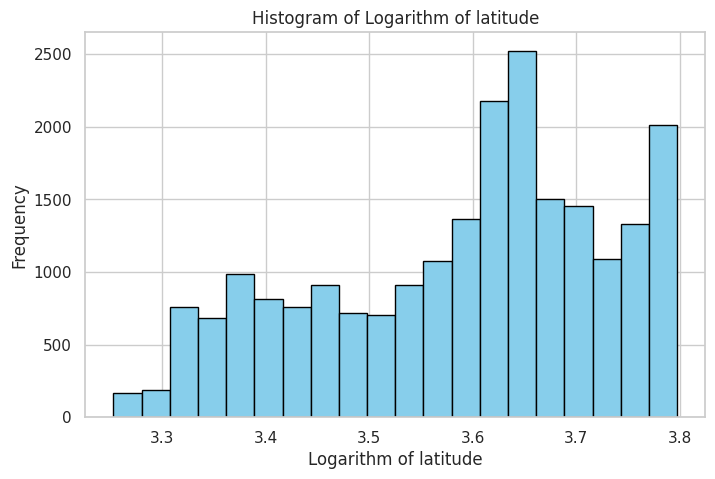

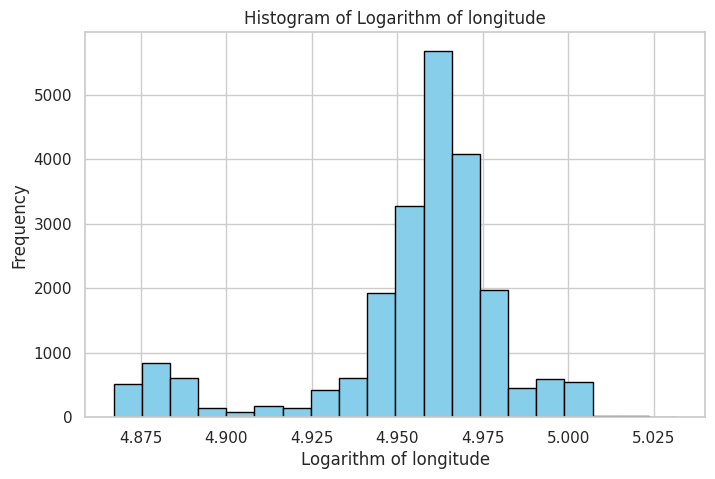

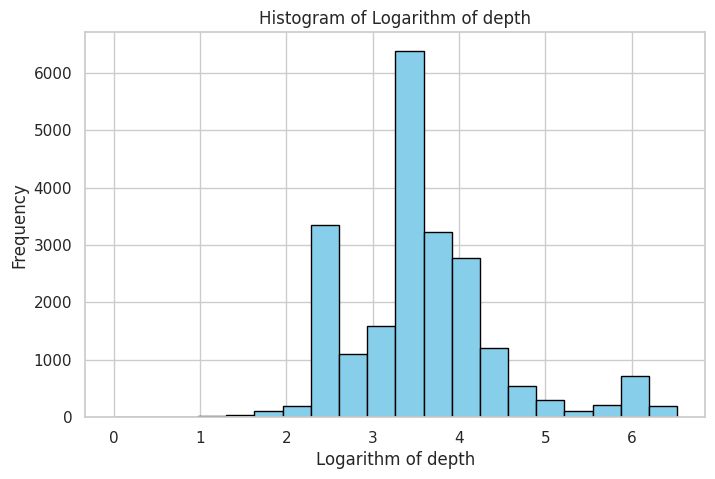

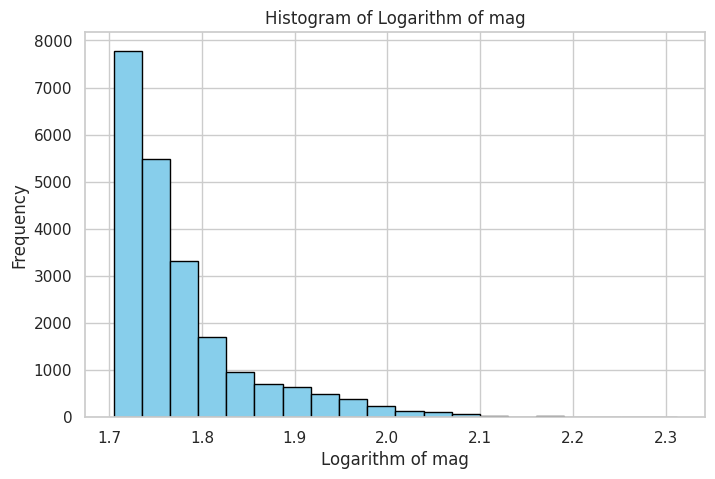

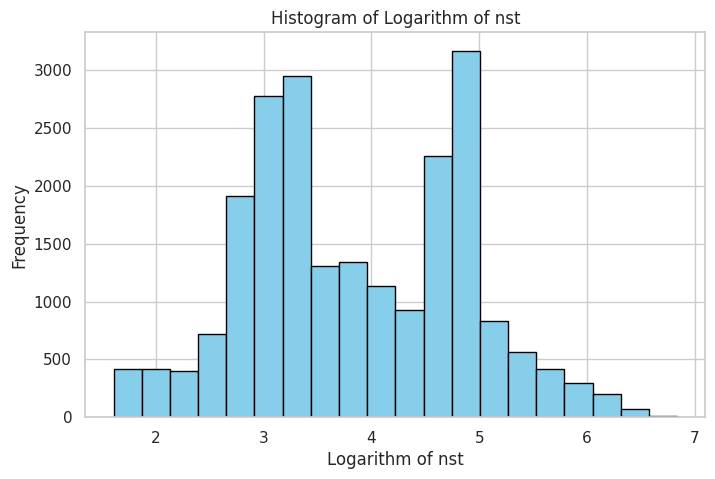

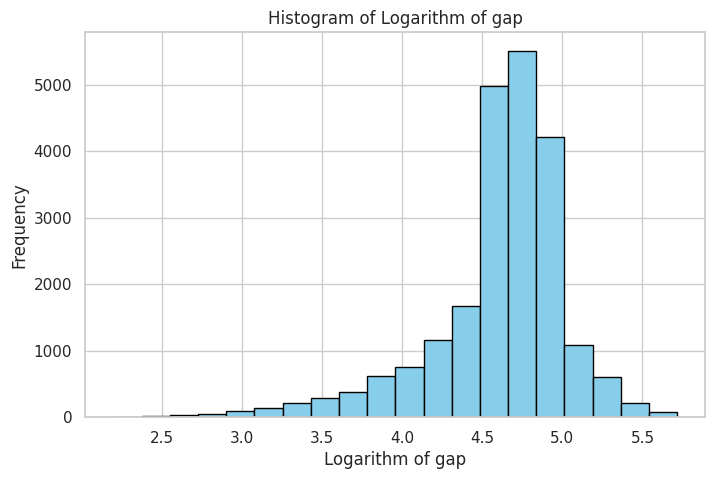

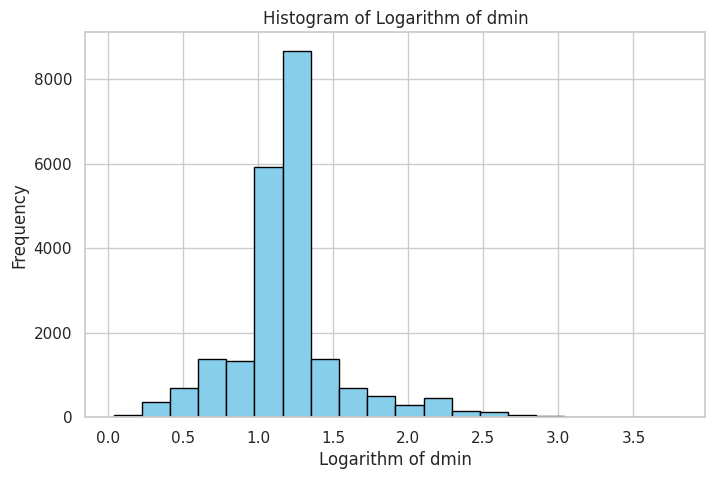

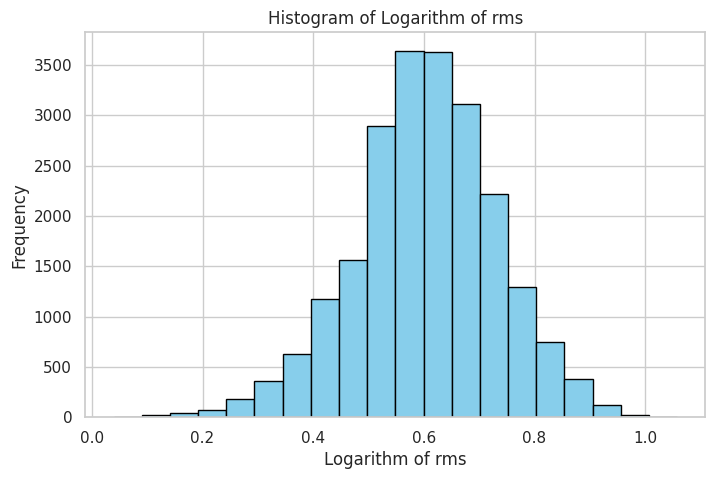

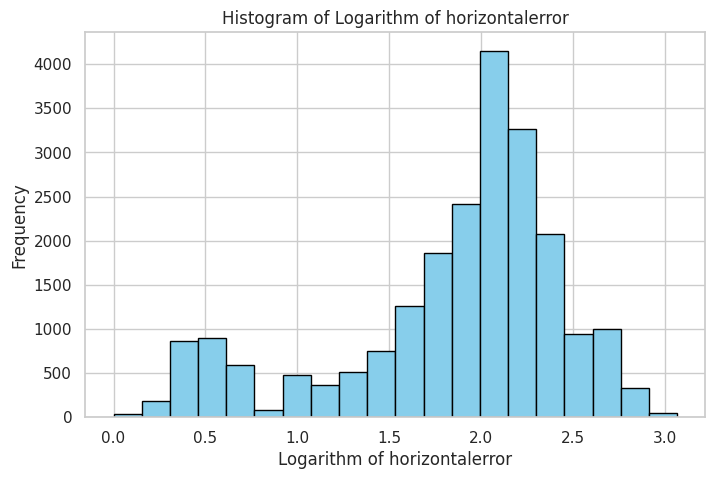

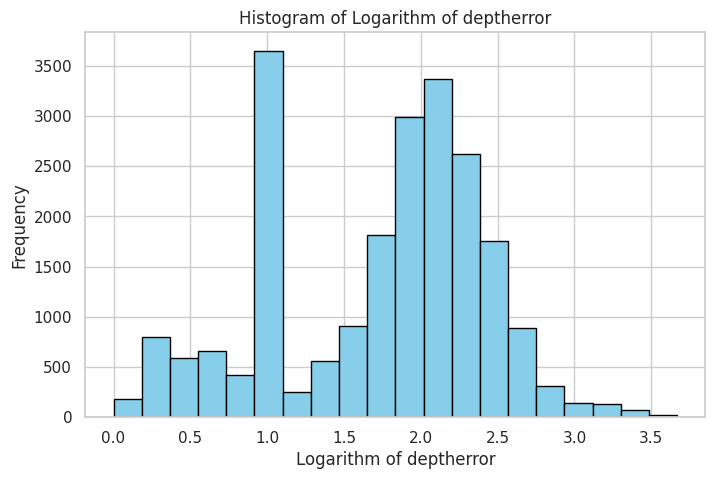

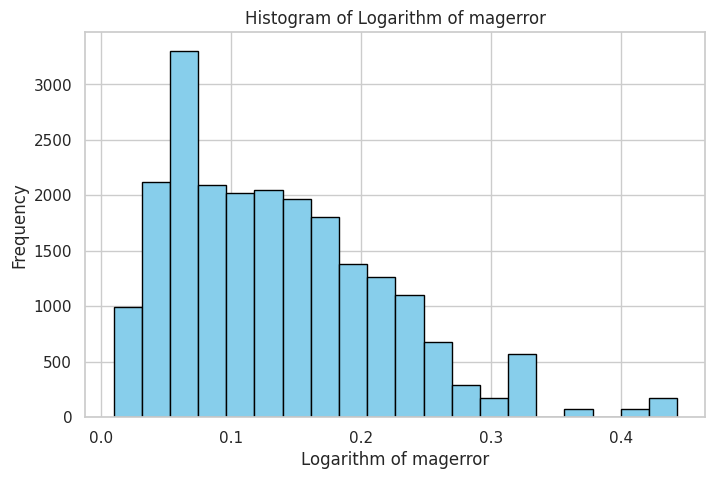

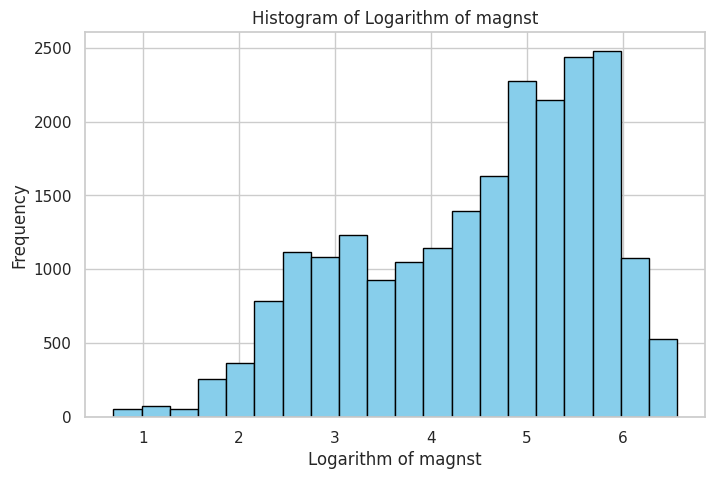

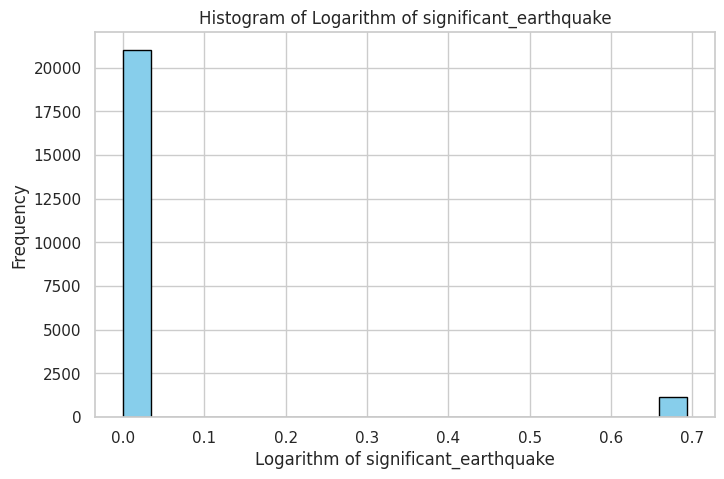

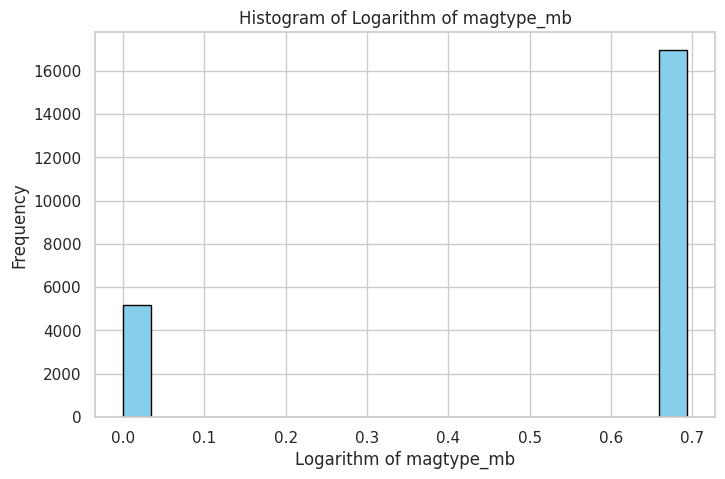

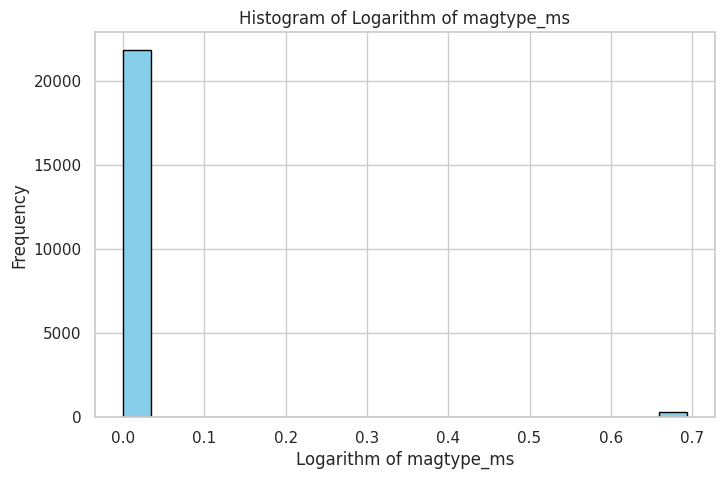

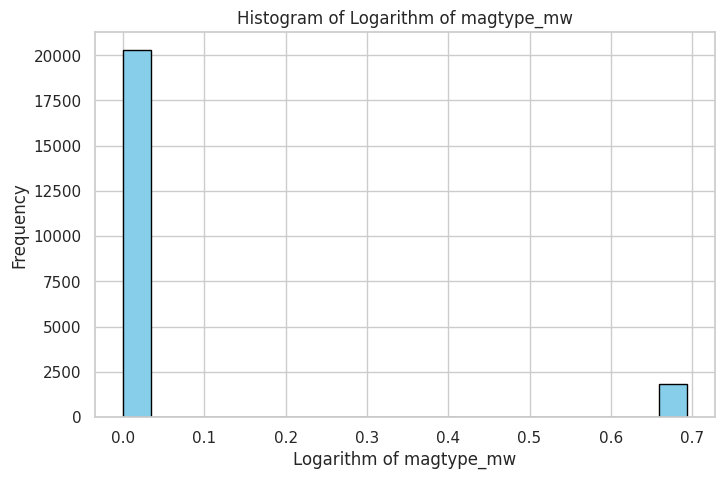

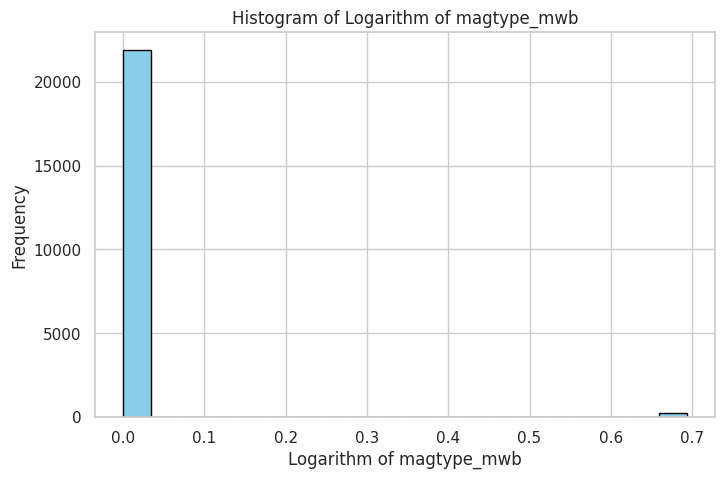

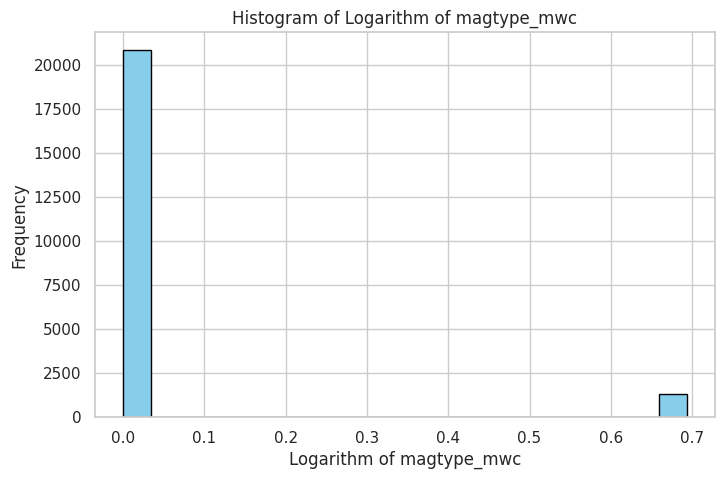

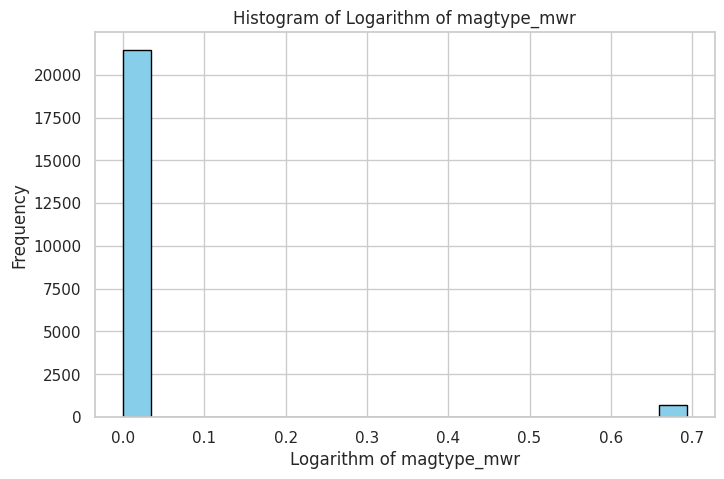

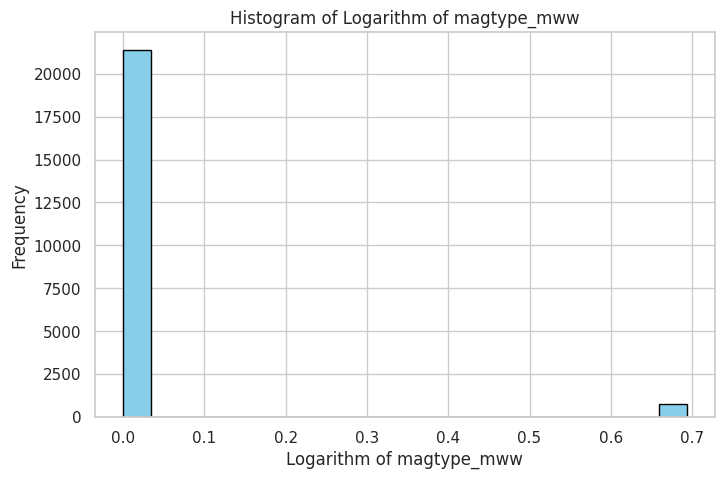

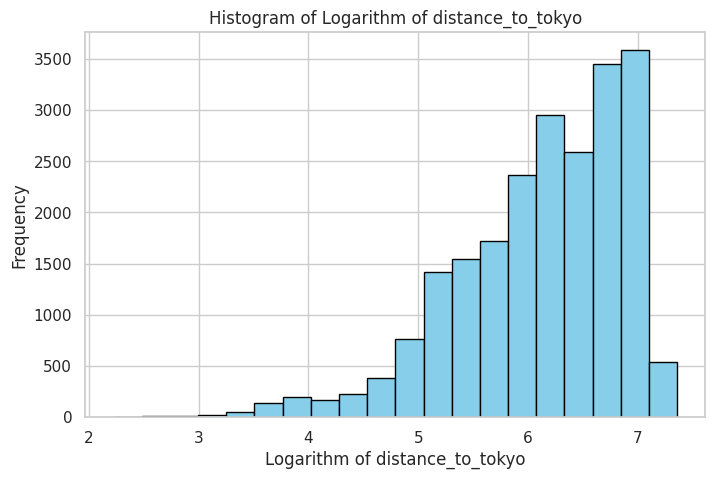

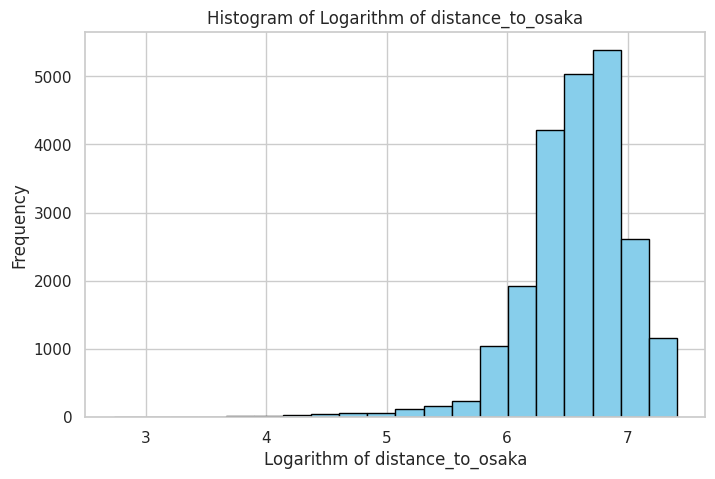

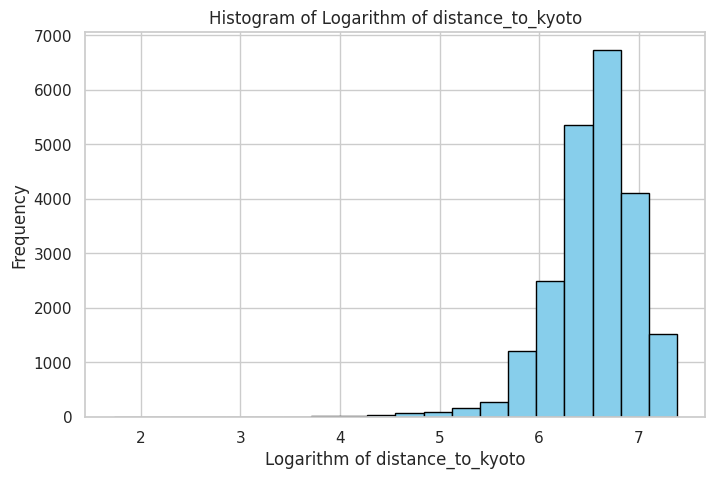

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning:

invalid value encountered in log1p



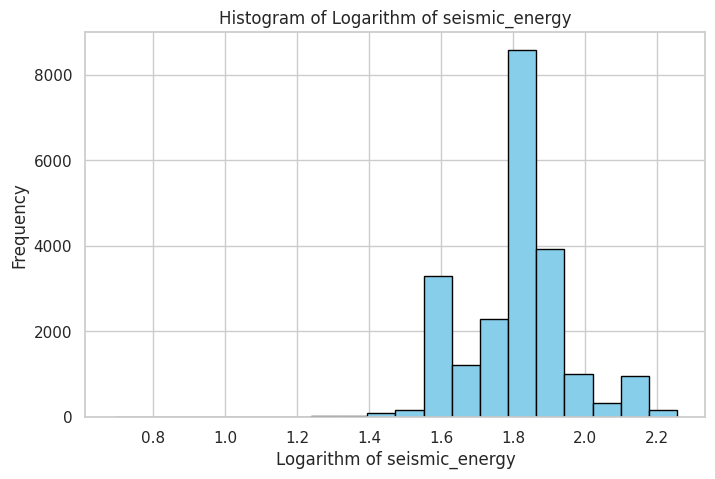

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame
# If your DataFrame is named differently, replace 'df' with your DataFrame name

# Select numerical columns
numerical_columns = data.select_dtypes(include=np.number).columns

# Plot histograms
for column in numerical_columns:
    plt.figure(figsize=(8, 5))

    # Calculate logarithm of values
    log_values = np.log1p(data[column])

    # Plot histogram
    plt.hist(log_values, bins=20, edgecolor='black', color='skyblue')

    # Set labels and title
    plt.xlabel(f'Logarithm of {column}')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of Logarithm of {column}')

    plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming 'data' is your DataFrame

# Separate features and target variable
X = data.drop(['significant_earthquake', 'time', 'place', 'magtype', 'net', 'id', 'updated', 'type', 'status', 'locationsource', 'magsource'], axis=1)
y = data['significant_earthquake']

# Check for and replace infinite values
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(0, inplace=True)  # You can choose a different strategy for handling NaN values

# Standardize the features (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with the principal components
columns = [f'PC{i}' for i in range(1, X_pca.shape[1] + 1)]
X_pca_df = pd.DataFrame(data=X_pca, columns=columns)

# Reset the index of y
y = y.reset_index(drop=True)

# Concatenate the principal components with the target variable
data_pca = pd.concat([X_pca_df, y], axis=1)

# Display the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:")
print(explained_variance_ratio)

# Display the cumulative explained variance
cumulative_explained_variance = explained_variance_ratio.cumsum()
print("\nCumulative Explained Variance:")
print(cumulative_explained_variance)

# Display the principal components DataFrame
print("\nPrincipal Components DataFrame:")
print(data_pca.head())


Explained Variance Ratio:
[1.28379928e-01 1.14463490e-01 8.57975979e-02 7.77675406e-02
 6.70114590e-02 5.09073810e-02 4.87343441e-02 4.68092243e-02
 4.57268073e-02 4.45407037e-02 4.33892604e-02 4.25168629e-02
 4.16024757e-02 3.80591104e-02 3.39663325e-02 2.94353772e-02
 2.14790667e-02 1.95062757e-02 1.13776503e-02 7.08853560e-03
 1.38242004e-03 4.89403676e-05 9.21535447e-06]

Cumulative Explained Variance:
[0.12837993 0.24284342 0.32864102 0.40640856 0.47342002 0.5243274
 0.57306174 0.61987097 0.66559777 0.71013848 0.75352774 0.7960446
 0.83764708 0.87570619 0.90967252 0.9391079  0.96058696 0.98009324
 0.99147089 0.99855942 0.99994184 0.99999078 1.        ]

Principal Components DataFrame:
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -1.647244  4.372593  1.757084 -2.352453  2.406451  0.115811 -0.495824   
1  3.331078  3.391237  2.191611 -1.909135  1.990689 -0.835532 -2.359353   
2  0.817263  4.954398  0.115105 -3.142247  0.570789 -1.160320 -2.335132   
3

In [ ]:
# Display the principal components DataFrame
print("\nPrincipal Components DataFrame:")
data_pca


Principal Components DataFrame:


PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0     -1.647244  4.372593  1.757084 -2.352453  2.406451  0.115811 -0.495824   
1      3.331078  3.391237  2.191611 -1.909135  1.990689 -0.835532 -2.359353   
2      0.817263  4.954398  0.115105 -3.142247  0.570789 -1.160320 -2.335132   
3      4.417858  2.702035  4.066324 -3.307358 -0.842053 -0.896761 -0.946562   
4      2.318636  3.017347 -0.081606 -2.486085  0.893626 -0.159814 -1.252518   
...         ...       ...       ...       ...       ...       ...       ...   
22118 -0.417521 -1.032785  0.146067 -0.738156  1.587774  1.875558  0.920932   
22119 -1.064850 -0.664643  0.441319 -1.216113 -1.084513  0.634826  0.756373   
22120  1.456576  2.450725  0.453220  2.259525 -1.267573 -0.103843 -1.637280   
22121 -1.199560 -0.195717  0.152142 -0.113534 -1.157152 -0.092303  0.017646   
22122  0.941560 -1.436421 -0.359602  0.411986 -0.251812 -0.499679 -0.040502   

            PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0     -0.077713 -1.574655 -0.177885  1.315818 -0.515879 -1.026945 -1.282350   
1     -0.963857  0.978011 -0.212522 -0.437714 -0.853004  0.141938  1.143315   
2     -0.649720  1.650962 -0.063672  0.093939 -0.708152 -0.904319  1.790105   
3     -1.649706 -2.879009  1.486403  3.484121  5.672404 -1.145523 -0.657663   
4      0.406236  0.600691 -0.243466  0.163762 -0.854706 -1.536163  0.653806   
...         ...       ...       ...       ...       ...       ...       ...   
22118 -0.027342 -1.319013  0.241019 -0.100697  0.681675  0.324759  0.419328   
22119  1.164689 -0.191223 -0.461414 -0.904991 -0.606500 -1.840632 -2.306135   
22120  3.719991  0.981258 -0.914688  2.398435  1.940553 -0.256127  0.706406   
22121  0.596915  0.607608 -0.348565 -0.260661 -0.827440 -1.102063 -0.932852   
22122  0.357601  0.034363 -0.161766  0.785028 -0.263353 -1.221184 -1.576147   

           PC15      PC16      PC17      PC18      PC19      PC20      PC21  \
0      0.942668 -0.406266 -1.500744  0.430495  1.110008 -0.079999 -0.038774   
1     -0.033157 -1.473447  1.236306  0.138529  1.049580 -0.333128  0.420217   
2     -0.382944 -1.591109 -0.324217  0.733526  2.185284  0.441954 -0.097253   
3      0.590043  0.497720 -0.345977  1.545474  1.783413  0.267678  0.254809   
4     -0.226527 -2.516856 -0.544165 -0.299975  0.035030  0.178576 -0.169003   
...         ...       ...       ...       ...       ...       ...       ...   
22118  1.073098 -0.009364 -0.273595 -0.097179  0.271393  0.477092  0.118886   
22119  0.484592  0.681617  0.445967 -0.345293  0.660063 -0.166297 -0.008048   
22120 -0.740990  1.318606  0.371220 -1.354692 -0.619050 -0.356189 -0.045197   
22121 -0.287979  0.151703  0.695557  0.031517  0.276071 -0.204951  0.015745   
22122  1.395995  0.099723 -0.359178 -0.053882  0.432289 -0.501056  0.138821   

           PC22      PC23  significant_earthquake  
0     -0.001232  0.025024                       1  
1      0.003890 -0.015595                       1  
2      0.006849 -0.000633                       1  
3      0.000276  0.018679                       1  
4      0.001438 -0.011630                       1  
...         ...       ...                     ...  
22118 -0.001620 -0.009536                       0  
22119 -0.001739  0.007960                       0  
22120 -0.003088  0.016184                       0  
22121  0.000189  0.006829                       0  
22122 -0.002898 -0.008855                       0  

[22123 rows x 24 columns]

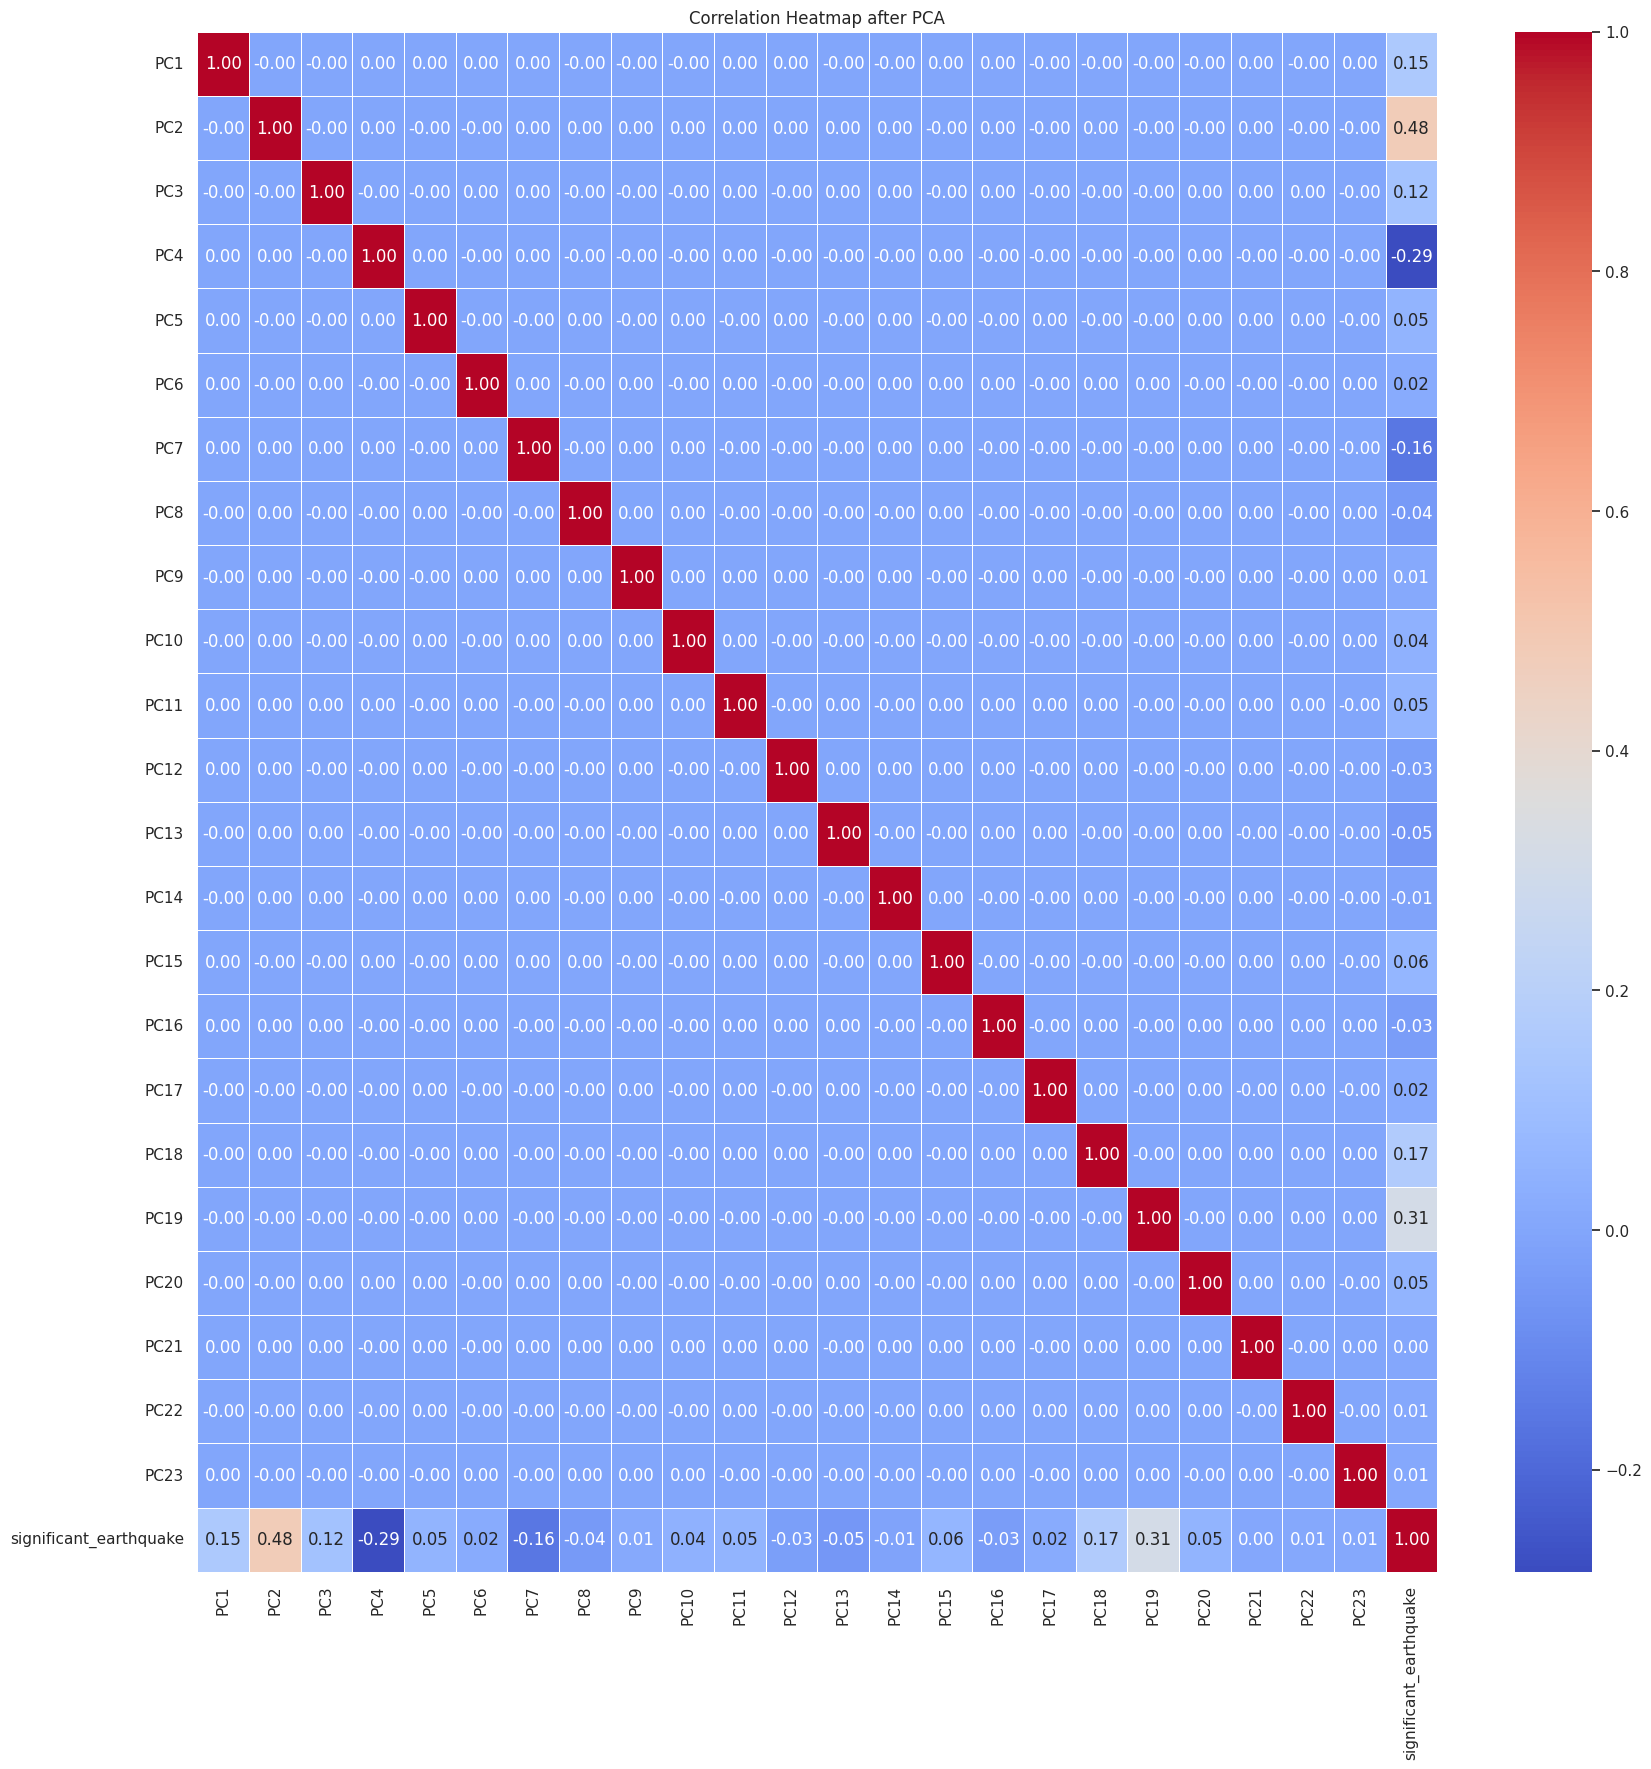

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Calculate the correlation matrix
correlation_matrix = data_pca.corr()

# Create a heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap after PCA')
plt.show()


In [ ]:
# Analyze Correlation
correlation_matrix_pca = data_pca.corr()

# Display the top correlated features with the target variable
correlation_with_target_pca = correlation_matrix_pca['significant_earthquake'].sort_values(ascending=False)
print(correlation_with_target_pca)


significant_earthquake    1.000000
PC2                       0.482690
PC19                      0.308301
PC18                      0.170148
PC1                       0.152676
PC3                       0.116922
PC15                      0.063328
PC20                      0.054840
PC11                      0.052390
PC5                       0.052077
PC10                      0.044667
PC17                      0.020981
PC6                       0.018291
PC9                       0.011806
PC23                      0.007360
PC22                      0.007249
PC21                      0.002152
PC14                     -0.010639
PC12                     -0.026956
PC16                     -0.030258
PC8                      -0.039769
PC13                     -0.052839
PC7                      -0.157294
PC4                      -0.285047
Name: significant_earthquake, dtype: float64
